# **Classification with kNN**

**Import data & train-/val-/testsplit**

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

train_images = train_images.reshape((60000,784))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,784))
test_images = test_images.astype("float32")/255

test_images, val_images, test_labels, val_labels = train_test_split(test_images,
                                                    test_labels,
                                                    test_size=0.5,
                                                    random_state=42)




**Classification of validation data for k in [1,50]**

In [ ]:

Error_value = []

#Fehler berechnen für k in [1,50]
for i in range(1, 50):
    #Modell definieren
    knn = KNeighborsClassifier(n_neighbors=i)
    #Training mit Trainingsdaten
    knn.fit(train_images, train_labels)
    #Prognose für Validierungsdaten
    prediction = knn.predict(val_images)
    #Fehlerwert in Liste speichern
    Error_value.append(np.mean(prediction != val_labels))




**Plot**

Text(0, 0.5, 'Fehlklassifikationsquote')

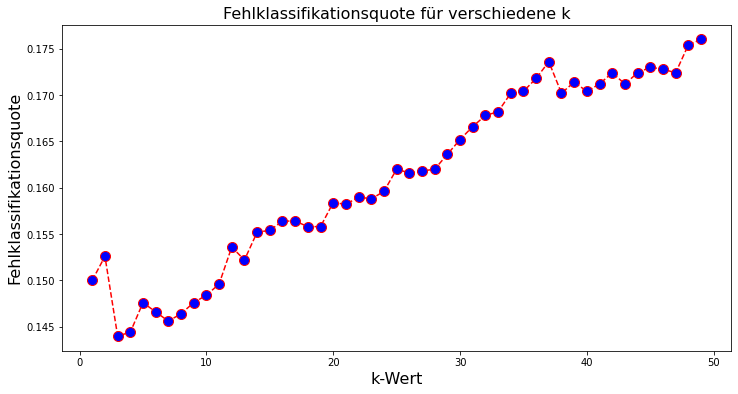

In [ ]:
#Plot Fehlklassifikationsquote
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), Error_value, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Fehlklassifikationsquote für verschiedene k', fontsize=16)
plt.xlabel('k-Wert', fontsize=16)
plt.ylabel('Fehlklassifikationsquote', fontsize=16)

In [ ]:
print(min(Error_value))

0.144


**Classification & results**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_images, train_labels)
#do the Predicition
prediction = knn.predict(test_images)
#save the Error value
Error = np.mean(prediction != test_labels)
print(Error)

0.1478
